In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation 
import numpy as np

In [ ]:
L1 = 1
L2 = 1
m1 = 1
m2 = 1
g = 9.81

In [ ]:
def deriv(y, t, L1, L2, m1, m2):
    """
    Return first derivatives of y = theta1, theta1dot, theta2, theta3dot
    """
    theta1, theta1dot, theta2, theta2dot = y 
    c1 = np.cos(theta1)
    s1 = np.sin(theta1)
    c2 = np.cos(theta2)
    s2 = np.sin(theta2)    
    c12 = np.cos(theta1-theta2)
    s12 = np.sin(theta1-theta2)
        ## Aquí abajo escribe el sistema en z1 y z2
    theta1dotdot = (m2*g*s2*c12 - m2*s12*(L1*theta1dot**2*c12 + L2*theta2dot**2) - (m1+m2)*g*s1) / L1 / (m1 + m2*s12**2)
    theta2dotdot = ((m1+m2)*(L1*theta1dot**2*s12 - g*s2 + g*s1*c12) + m2*L2*theta2dot**2*s12*c12) / L2 / (m1 + m2*s12**2)
    return theta1dot, theta1dotdot, theta2dot, theta2dotdot

In [ ]:
# Aquí creamos un array para el tiempo t 
tmax = 20
dt = 0.04
t = np.arange(0, tmax+dt, dt)

# Condiciones iniciales: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0]) #inicialmente en reposo, las velocidades son 0

# Numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

In [ ]:
# Unpack theta values as a function of time for plotting purposes
theta1, theta2 = y[:,0], y[:,2]

# Convert to Cartesian coordinates
###############Importar aquí el código de la fase 1
# Del array y tomamos los valores de theta1 y theta2
theta1, theta2 = y[:,0], y[:,2]

# Define las coordenadas cartesianas a partir de los ángulos
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

### Simulación de una situación caótica

Se obtiene una situación caótica si se considera un conjunto de péndulos, cada uno con condiciones iniciales ligeramente diferentes.

In [ ]:
# time frame
tmax = 20
dt = 0.04
t = np.arange(0, tmax+dt, dt)

# número de péndulos
############### Fijar el número de péndulos que se quieren usar (por ejemplo 100)
npend = 100

# Range of initial conditions, only slightly different
frac    = 0.00001
theta10 = 3*np.pi/7
theta20 = 3*np.pi/4
### Aquí se ponen como condiciones iniciales condiciones ligeramente diferentes para cada péndulo
y0i = [ np.array([theta10,0,theta20+i*theta20*frac,0]) for i in range(npend) ]


In [ ]:
### Usando odeint, calcula una solución "yi" para cada péndulo y cada condición inicial y0i
## El resultado es una lista de 100 arrays, cada uno con los valores y de la solución de cada péndulo 
yi =[odeint(deriv,y0,t, args=(L1,L2,m1,m2)) for y0 in y0i]

In [ ]:
# Usando las soluciones de las ecuaciones, calcular las coordenadas cartesianas para todos los péndulos
## (hay que iterar sobre el número de péndulos)
x1i=[]
x2i=[]
y1i= []
y2i= []
for y in yi:
  theta1, theta2 = y[:,0], y[:,2]
  x11 = L1 * np.sin(theta1)
  y11 = -L1 * np.cos(theta1)
  x22 = x11 + L2 * np.sin(theta2)
  y22 = y11 - L2 * np.cos(theta2)
  x1i.append(x11)
  y1i.append(y11)
  x2i.append(x22)
  y2i.append(y22)

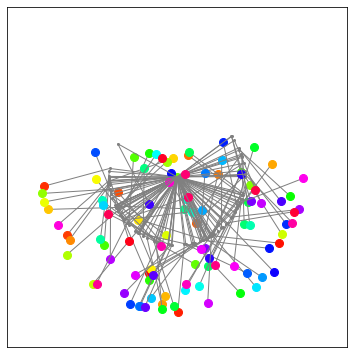

In [ ]:
## Reproducir la animación como se hizo para un péndulo, iterando sobre todos los péndulos y las coordenadas de cada péndulo
## 
# plot one point in time
i = 500
r = 0.5
trail_secs= 1
ns= 20
cmap =get_cmap(npend) 
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax= fig.add_subplot(111)
c0= ax.plot (0,0,'o',markersize=3,color='black')
icol = 0
for x11, x22, y11, y22 in zip(x1i,x2i,y1i,y2i):
    lines, = ax.plot([0, x11[i], x22[i]],[0, y11[i], y22[i]], lw=1, c='grey')
    c1, = ax.plot(x11[i],y11[i],'o',markersize=2,color='grey')
    с2, = ax.plot(x22[i], y22[i],'o',markersize=8,color=cmap(icol))  
    icol+=1
  
ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable="box")
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()


In [ ]:
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax= fig.add_subplot(111)
c0= ax.plot (0,0,'o',markersize=3,color='black')

arm= []
mm1= []
mm2= []
trail= []
icol= 0
for i in range(npend):
  lines,= ax.plot([],[], lw=1, c='grey') 
  c1,= ax.plot([],[], 'o', markersize=2, color='grey')
  c2,= ax.plot([],[], 'o', markersize=10, color=cmap(icol))
  arm.append(lines)
  mm1.append(c1)
  mm2.append(c2)
  icol+=1

  ax.set_xlim(-L1-L2-r, L1+L2+r)
  ax.set_ylim(-L1-L2-r, L1+L2+r)
  ax.set_aspect("equal", adjustable="box")
  plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
  plt.show()

In [ ]:
import networkx as nx
from matplotlib.animation import FuncAnimation, FFMpegWriter,  PillowWriter 
%matplotlib inline
from IPython.display import HTML, Image


def pendulo_init():
  for lines, c1, c2, trail_i in zip(arm,mm1,mm2,trail):
    lines.set_data([],[]);
    c1.set_data([],[])
    c2.set_data([],[])
    s= int(trail_secs/dt)// ns
  return tuple(arm,)

def pendulo_animate(i):
  np=0
  for lines,c1,c2 in zip(arm,mm1,mm2):
    x11= x1i[np]
    x22= x2i[np]
    y11= y1i[np]
    y22= y2i[np]
    lines.set_data([0,x11[i],x22[i]],[0,y11[i],y22[i]])
    c1.set_data([x11[i]],[y11[i]])
    c2.set_data([x22[i]],[y22[i]])
    np+=1
  return tuple(arm,)

anim100= FuncAnimation(fig,pendulo_animate,frames=range(len(x1i[0])),init_func=pendulo_init,blit=True)


In [ ]:
HTML(anim100.to_html5_video())